In [535]:
# Code from https://www.youtube.com/watch?v=d_DJ6rVuDX0&list=PLxgDUj5eygKnSd4MYHIuAC7E3VEPm_WLO&index=23
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [536]:
POINTS = 1000
WK1 = 0.8
R1 = 4
WK2 = WK1
R2 = 8

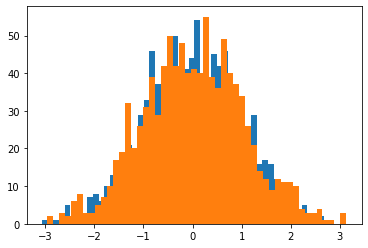

In [537]:
n1 = np.random.randn(POINTS)
n2 = np.random.randn(POINTS)
plt.hist(n1, bins=50);
plt.hist(n2, bins=50);

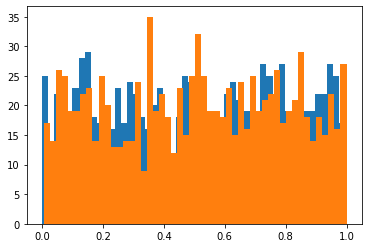

In [538]:
u1 = np.random.rand(POINTS)
u2 = np.random.rand(POINTS)
plt.hist(u1, bins=50);
plt.hist(u2, bins=50);

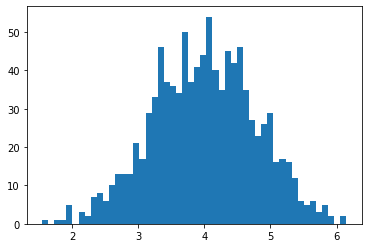

In [539]:
# distance from the center for ring1
r1 = WK1 * n1 + R1
plt.hist(r1, bins=50);

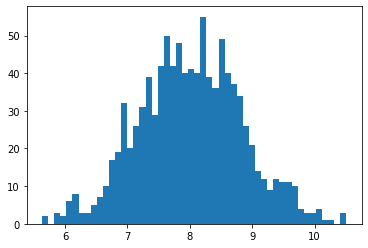

In [540]:
# distance from the center for ring2
r2 = WK2 * n2 + R2
# type(xr2)
plt.hist(r2, bins=50);

In [541]:
r = np.concatenate((r1, r2))
 

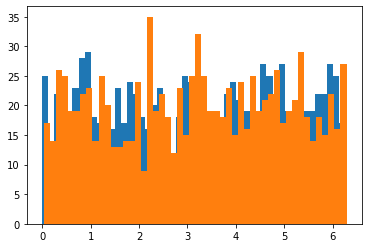

In [542]:
theta1 = 2 * np.pi * u1
theta2 = 2 * np.pi * u2
plt.hist(theta1, bins=50);
plt.hist(theta2, bins=50);

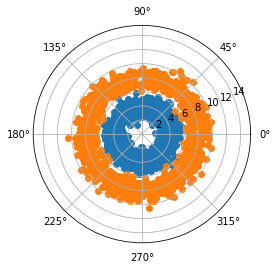

In [543]:
ax = plt.subplot(111, projection='polar');
a = plt.scatter(theta1, r1, cmap=plt.cm.hsv);
b = plt.scatter(theta2, r2, cmap=plt.cm.hsv);

In [544]:
polar2z = lambda r,θ: r * np.exp( 1j * θ )

def polar_to_cart(r, a):
    x = r * np.cos(a)
    y = r * np.sin(a)
    return x, y

def add_cart_to_row(row, in_cols, out_cols):
    x, y = polar_to_cart(row[in_cols[0]], row[in_cols[1]])
    row[out_cols[0]] = x
    row[out_cols[1]] = y
    return row

def get_cart_from_row(row, r_col, a_col):
    return polar_to_cart(row[r_col], row[a_col])


def polar_to_cart_2(polar_point):
    cart_point = np.array([0, 0])
    cart_point[0] = polar_point[0] * np.cos(polar_point[1])
    cart_point[1] = polar_point[0] * np.sin(polar_point[1])
    return cart_point

In [545]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

df1['radius'] = r1
df1['angle'] = theta1
df1['y'] = 0

df2['radius'] = r2
df2['angle'] = theta2
df2['y'] = 1

In [546]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df

,radius,angle,y
0,3.748328,3.464448,0
1,4.231714,4.278053,0
2,4.132694,1.814981,0
3,5.134029,0.741061,0
4,3.381454,5.971626,0
...,...,...,...
1995,7.972990,1.841925,1
1996,7.676596,2.464336,1
1997,9.835202,0.393566,1
1998,8.994024,0.658169,1


In [547]:
# df1 = df.apply(add_cart_to_row, args=(['R1', 'A1'], ['X1', 'Y1']), axis=1)
# asd = df.apply(get_cart_from_row, args=('R1', 'A1'), axis=1)
# type(asd) return Series of tuples
df['x1'] , df['x2'] = zip(*df.apply(get_cart_from_row, args=('radius', 'angle'), axis=1))
df

,radius,angle,y,x1,x2
0,3.748328,3.464448,0,-3.554664,-1.189255
1,4.231714,4.278053,0,-1.780739,-3.838798
2,4.132694,1.814981,0,-0.999142,4.010096
3,5.134029,0.741061,0,3.787645,3.465833
4,3.381454,5.971626,0,3.218659,-1.036561
...,...,...,...,...,...
1995,7.972990,1.841925,1,-2.135315,7.681732
1996,7.676596,2.464336,1,-5.982331,4.810596
1997,9.835202,0.393566,1,9.083277,3.771641
1998,8.994024,0.658169,1,7.115293,5.501370


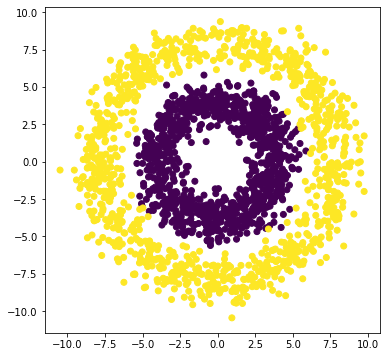

In [548]:
plt.figure(figsize=(6, 6))
plt.scatter(df['x1'], df['x2'], c=df['y']);

In [549]:
df

,radius,angle,y,x1,x2
0,3.748328,3.464448,0,-3.554664,-1.189255
1,4.231714,4.278053,0,-1.780739,-3.838798
2,4.132694,1.814981,0,-0.999142,4.010096
3,5.134029,0.741061,0,3.787645,3.465833
4,3.381454,5.971626,0,3.218659,-1.036561
...,...,...,...,...,...
1995,7.972990,1.841925,1,-2.135315,7.681732
1996,7.676596,2.464336,1,-5.982331,4.810596
1997,9.835202,0.393566,1,9.083277,3.771641
1998,8.994024,0.658169,1,7.115293,5.501370


In [550]:
# df['x1^2'] = df['x1']*df['x1']
df['x1^2'] = np.power(df['x1'], 2)
df['x2^2'] = np.power(df['x2'], 2)
df['x1*x2'] = df['x1'] * df['x2']
df

,radius,angle,y,x1,x2,x1^2,x2^2,x1*x2
0,3.748328,3.464448,0,-3.554664,-1.189255,12.635635,1.414327,4.227401
1,4.231714,4.278053,0,-1.780739,-3.838798,3.171033,14.736367,6.835898
2,4.132694,1.814981,0,-0.999142,4.010096,0.998285,16.080872,-4.006656
3,5.134029,0.741061,0,3.787645,3.465833,14.346254,12.011997,13.127344
4,3.381454,5.971626,0,3.218659,-1.036561,10.359769,1.074460,-3.336338
...,...,...,...,...,...,...,...,...
1995,7.972990,1.841925,1,-2.135315,7.681732,4.559571,59.009004,-16.402918
1996,7.676596,2.464336,1,-5.982331,4.810596,35.788288,23.141836,-28.778581
1997,9.835202,0.393566,1,9.083277,3.771641,82.505928,14.225275,34.258860
1998,8.994024,0.658169,1,7.115293,5.501370,50.627398,30.265068,39.143859


In [551]:
colls_to_save = ['x1', 'x2', 'x1^2', 'x2^2', 'x1*x2', 'y']
small_df =  df[colls_to_save]
small_df

,x1,x2,x1^2,x2^2,x1*x2,y
0,-3.554664,-1.189255,12.635635,1.414327,4.227401,0
1,-1.780739,-3.838798,3.171033,14.736367,6.835898,0
2,-0.999142,4.010096,0.998285,16.080872,-4.006656,0
3,3.787645,3.465833,14.346254,12.011997,13.127344,0
4,3.218659,-1.036561,10.359769,1.074460,-3.336338,0
...,...,...,...,...,...,...
1995,-2.135315,7.681732,4.559571,59.009004,-16.402918,1
1996,-5.982331,4.810596,35.788288,23.141836,-28.778581,1
1997,9.083277,3.771641,82.505928,14.225275,34.258860,1
1998,7.115293,5.501370,50.627398,30.265068,39.143859,1


In [552]:
small_df.to_csv('donut_dataset.csv', index=False)